# Zadanie 1

In [78]:
import numpy as np
import matplotlib.pyplot as plt

In [79]:
def qr_factorization(A):
    s = A.shape
    n = max(s[0], s[1])
    e_vectors = []
    Q = np.zeros((n, n)) 
    R = np.zeros((n, n))
    for i in range(n):
        u = A[:,i]
        if i ==0:
            e_vectors.append(u / np.linalg.norm(u))
        else:
            e = u
            for k in range(i):
                e -= (e_vectors[k] @ u) * e_vectors[k]
            e_vectors.append(e/ np.linalg.norm(u))
    for i in range(n):
        for j in range(n):
            Q[i, j] = e_vectors[j][i]
    for i in range(n):
        for j in range(n):
            R[i, j] = np.dot(e_vectors[i], A[:, j])
    return Q, R



In [80]:
for size in [10, 50, 100, 400]:
    A = np.random.rand(size, size)
    Q, R = qr_factorization(A)
    Q_lib, R_lib = np.linalg.qr(A)
    print(f"Error: {np.linalg.norm(np.absolute(Q) - np.absolute(Q_lib)) + np.linalg.norm(np.absolute(R) - np.absolute(R_lib))}")


Error: 1.238902886546589e-14
Error: 4.438308136078904e-13
Error: 6.484890554865181e-13
Error: 1.8522291507346462e-12


In [81]:
def generate_matrix_with_random_cond(A, cond):
    U, _, V = np.linalg.svd(A)
    D = np.linspace(cond, 1, A.shape[0])
    return U @ np.diag(D) @ V

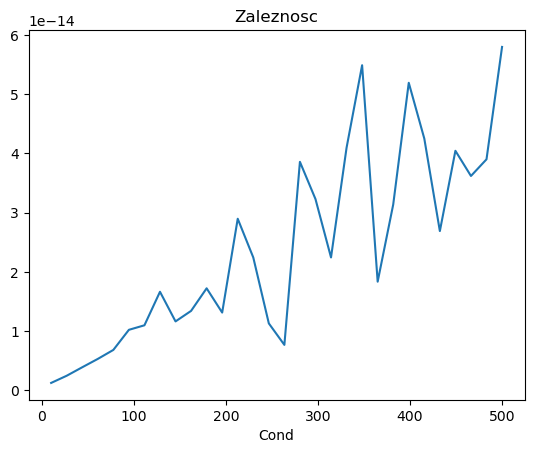

In [82]:
values = []
n = 8
conds = np.linspace(10, 500, 30)
for i in range(30):
    A = np.random.rand(n, n)
    A = generate_matrix_with_random_cond(A, conds[i])
    Q, R = qr_factorization(A)
    values.append(np.linalg.norm(np.eye(n) - Q @ Q.T))
    
plt.title("Zaleznosc")
plt.xlabel("Cond")
plt.plot(conds, values)
plt.show()

# Zadanie 2

In [83]:
def solve_overdetermined_equation(A, b):
    Q, R = np.linalg.qr(A)
    Qb = np.dot(Q.T,b) 
    x =  np.linalg.solve(R,Qb)
    return x

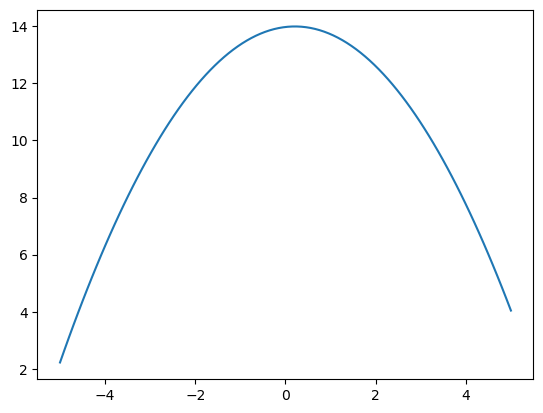

In [84]:
b = np.array([2,7,9,12,13,14,14,13,10,8,4])
A = np.zeros((11, 3))
for i in range(-5,6):
    A[i+5, :] = [i**2, i, 1]

x = solve_overdetermined_equation(A, b)

points = np.linspace(-5, 5, 100)
plt.plot(points, x[0] * points**2 + x[1] * points + x[2])
plt.show()